In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

In [9]:
n_sample = 100
sigma = 0.15

X = np.random.uniform(0.0, 1.0, n_sample)
# Y = X**2+3*X+np.random.normal(0.0, sigma, X.size)
Y = 10*X**3+5*X**2+3*X+np.random.normal(0.0, sigma, X.size)
X = X.reshape(-1,1)

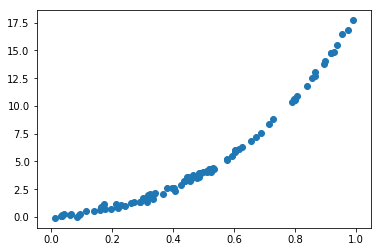

In [10]:
plt.scatter(X,Y)
plt.savefig("poly_reg.pdf")

### linear model

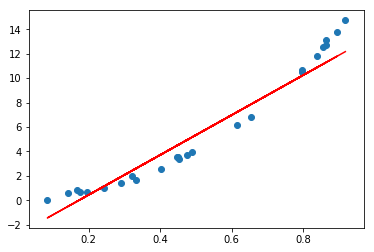

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predicted, color='red')

In [12]:
print("MSE=%s" % mean_squared_error(y_test, y_predicted))

MSE=1.3933525801845754


### polynomial model

In [13]:
degree = 3
poly =  PolynomialFeatures(degree,include_bias=False)
X_ = poly.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_,Y)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_predicted = model.predict(x_test)

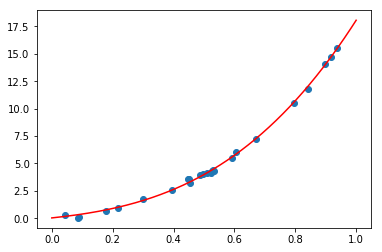

In [16]:
plt.scatter(x_test[:,0], y_test)
x_poly_line = np.linspace(0,1,1000).reshape(-1,1)
y_poly_line = model.predict(poly.fit_transform(x_poly_line))
plt.plot(x_poly_line, y_poly_line, color='red')

In [74]:
print("MSE=%s" % mean_squared_error(y_test, y_predicted))

MSE=0.023561872773
